In [11]:
#9조 뭐입지니 모델링 팀원 김형우 produce
#category_classification_model.py:
#학습된 모델을 활용해 사용자의 데이터를 기반으로
#최대 3순위까지의 추천 코디와 추천도를 반환한다.

import pandas as pd
import numpy as np
import joblib

#학습에 활용될 X, Y 값을 불러온다.
df_feature = pd.read_csv("data_x.csv",sep=',')
df_target = pd.read_csv("data_y.csv",sep=',')

In [12]:
from sklearn.model_selection import train_test_split
#학습할 data와 테스트할 dat를 분리한다. (8:2)비율
train_x,test_x,train_y,test_y = train_test_split(df_feature,df_target,test_size=0.05)

In [1]:
#선형 회귀 진행
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import roc_auc_score,accuracy_score,mean_squared_error,r2_score

model = lr()
model.fit(train_x,train_y)
print("모델의 회귀 계수는: ",model.coef_,"이고 모델의 절편은 : ",model.intercept_)
pred_y = model.predict(test_x)
print("RMSE on Test Set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

NameError: name 'train_x' is not defined

In [14]:
#랜덤포래스트 regressor 진행
from sklearn.ensemble import RandomForestRegressor as rfr
import joblib
#다차원 배열 1차원으로 변환
train_y = np.ravel(train_y,order='C')
model = rfr(n_estimators=100,max_depth=5,min_samples_split=30,min_samples_leaf=15)
model.fit(train_x,train_y)


y = model.predict(tx)

pred_y = model.predict(train_x)
print("RMSE on Test Set : {0:.5f}".format(mean_squared_error(train_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(train_y,pred_y)))

[6.2519359]
(4955, 8)
(1,)


['./learnModel/rfr_model_hw.pkl']

In [16]:
#랜덤 포래스트 분류 진행 --> 실제 코디 추천 적용 모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#별도의 하이퍼 파라미팅은 진행하지 않음
clf = RandomForestClassifier(oob_score=True)
clf.fit(train_x, train_y)

predicted = clf.predict(test_x)
accuracy = accuracy_score(test_y, predicted)

print("훈련 세트 정확도: {:.5f}".format(clf.score(train_x, train_y)) )
print("테스트 세트 정확도: {:.5f}".format(clf.score(test_x, test_y)) )
print("OOB 샘플의 정확도: {:.5f}".format(clf.oob_score_) )

#학습된 모델 저장
yp = clf.predict_proba(tx)
joblib.dump(clf,'./learnModel/model_cody.pkl')

훈련 세트 정확도: 1.00000
테스트 세트 정확도: 1.00000
OOB 샘플의 정확도: 0.73098
[3]
랜덤 포레스트 정확도: 0.0000
랜덤 포레스트 정확도: 0.0000
랜덤 포레스트 정확도: 0.8000
랜덤 포레스트 정확도: 0.0100
랜덤 포레스트 정확도: 0.0000
랜덤 포레스트 정확도: 0.0400
랜덤 포레스트 정확도: 0.0000
랜덤 포레스트 정확도: 0.0000
랜덤 포레스트 정확도: 0.0400
랜덤 포레스트 정확도: 0.0300
랜덤 포레스트 정확도: 0.0400
랜덤 포레스트 정확도: 0.0000
랜덤 포레스트 정확도: 0.0000
랜덤 포레스트 정확도: 0.0000


['./learnModel/test2.pkl']

findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.


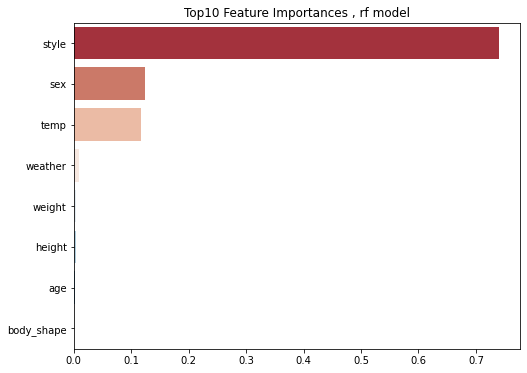

In [7]:
#영향을 주는 feature 시각화
import matplotlib.pyplot as plt
import seaborn as sns

rf_importances_values = model.feature_importances_
rf_importances = pd.Series(rf_importances_values,index=train_x.columns)
rf_top10 = rf_importances.sort_values(ascending=False)[:10]

plt.rcParams["font.family"] = 'NanumGothicCoding'
plt.figure(figsize=(8,6))
plt.title('Top10 Feature Importances , rf model')
sns.barplot(x=rf_top10,y=rf_top10.index,palette="RdBu")
plt.show()

In [8]:
#그래디언트 부스팅 Regressor 진행
from sklearn.ensemble import GradientBoostingRegressor as grb

model = grb(n_estimators=100,learning_rate=0.1,max_depth=5,min_samples_split=30,min_samples_leaf=15)
model.fit(train_x,train_y)

y = model.predict(tx)

pred_y = model.predict(test_x)
print("RMSE on Test Set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

[5.919504]
RMSE on Test Set : 0.07649
R-squared Score on Test set : nan


C:\Users\82105\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


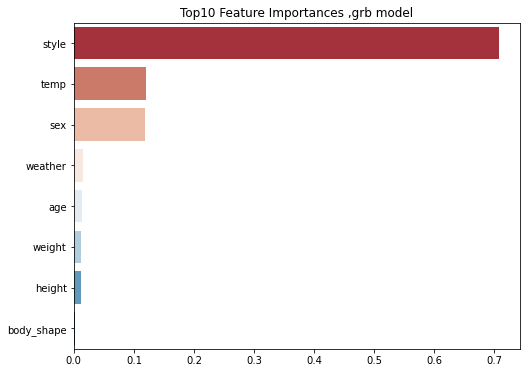

In [9]:
#영향을 주는 feature 시각화
grb_importances_values = model.feature_importances_
grb_importances = pd.Series(grb_importances_values,index=train_x.columns)
grb_top10 = grb_importances.sort_values(ascending=False)[:10]

plt.rcParams["font.family"] = 'NanumGothicCoding'
plt.figure(figsize=(8,6))
plt.title('Top10 Feature Importances ,grb model')
sns.barplot(x=grb_top10,y=grb_top10.index,palette="RdBu")
plt.show()

In [227]:
#XG부스트 Regressor 진행
from xgboost import XGBRegressor as xgb

model = xgb(n_estimators=100,gamma=1,eta=0.1,max_depth=5,reg_lambda=5,reg_alpha=5)
model.fit(train_x,train_y)

pred_y = model.predict(test_x)
print("RMSE on Test Set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

RMSE on Test Set : 0.23970
R-squared Score on Test set : 0.99449


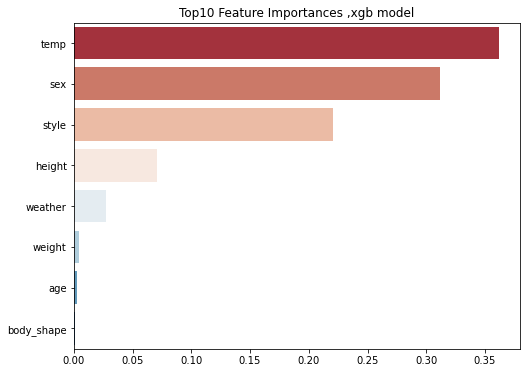

In [228]:
#영향을 주는 feature 시각화
xgb_importances_values = model.feature_importances_
xgb_importances = pd.Series(xgb_importances_values,index=train_x.columns)
xgb_top10 = xgb_importances.sort_values(ascending=False)[:10]

plt.rcParams["font.family"] = 'NanumGothicCoding'
plt.figure(figsize=(8,6))
plt.title('Top10 Feature Importances ,xgb model')
sns.barplot(x=xgb_top10,y=xgb_top10.index,palette="RdBu")
plt.show()

In [229]:
#모델들의 훈련 시간과 정확도들을 출력하며 가장 적합한 모델 판별
import pickle
import joblib
import time
model_list=[lr(),rfr(),grb(),xgb()]
model_rslt = []
for i in range(len(model_list)):
    start_time = time.process_time()
    model = model_list[i]
    model.fit(train_x,train_y)
    end_time = time.process_time()
    joblib.dump(model,'{}_model.pkl'.format(i)) #모델 저장, sklearn을 통해서 만들어진 모델은 pkl 파일로 저장
    print(f"*{model} 결과 시작")
    print("--- {0:.5f}sec, training coplete ---",format(end_time-start_time))
    pred_y = model.predict(test_x)
    model_rslt.append(model)
    print("RMSE on Test Set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
    print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))
    print("---------------------------------------------------------------------------")

*LinearRegression() 결과 시작
--- {0:.5f}sec, training coplete --- 0.0
RMSE on Test Set : 3.08196
R-squared Score on Test set : 0.08971
---------------------------------------------------------------------------
*RandomForestRegressor() 결과 시작
--- {0:.5f}sec, training coplete --- 0.875
RMSE on Test Set : 0.16747
R-squared Score on Test set : 0.99731
---------------------------------------------------------------------------
*GradientBoostingRegressor() 결과 시작
--- {0:.5f}sec, training coplete --- 0.1875
RMSE on Test Set : 1.05604
R-squared Score on Test set : 0.89312
---------------------------------------------------------------------------
*XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
      